In [346]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels as sm
from scipy.stats import ttest_1samp
from scipy.stats import t
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


# Formatting

In [424]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 24

plt.rc('font', size=MEDIUM_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE)     
plt.rc('axes', labelsize=BIGGER_SIZE)    
plt.rc('xtick', labelsize=MEDIUM_SIZE)   
plt.rc('ytick', labelsize=MEDIUM_SIZE)    
plt.rc('legend', fontsize=MEDIUM_SIZE)   
plt.rc('figure', titlesize=BIGGER_SIZE)

In [408]:
#LEFT TO DO: 

# budget add medium category ?
# inflation-adjusted $$, CPI multiplier ?
# country (pie chart)
# poisson distribution? 
# interactive graphs? hypothesis testing?
# clean notebook
# add explanations
# check linear regression and correlation lab

#https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html

#Graph formatting:

#colors
#DONE: remove scientific notation: ax1.ticklabel_format(style='plain', axis='y')
#color of column you are interested in
#format labels (xtick, ytick)
#vertical names: set_xticklabels(rotation=30)
#add titles
#format scale
#width 
#subplots? or not?

# Read the file

In [335]:
df_movies = pd.read_csv('movies.csv', encoding='latin-1')

In [4]:
df_movies_2 = df_movies[df_movies['budget'] > 0]
df_movies_3 d= df_movies_2.reset_index()

In [5]:
#check if any NaN values
df_movies_3.isna().any()

index       False
budget      False
company     False
country     False
director    False
genre       False
gross       False
name        False
rating      False
released    False
runtime     False
score       False
star        False
votes       False
writer      False
year        False
dtype: bool

In [8]:
df_movies_3.dtypes

index         int64
budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

## Create the 'profit column'

In [9]:
#add column for Gross - Budget
df_movies_3['profit'] = df_movies_3['gross'] - df_movies_3['budget']

## We create the 1980s and 2010s data sets 

In [ ]:
#select data from 1986 to 1992:
years = [1986, 1987, 1988, 1989,1990,1991,1992]
df_movies_3.year.isin(years)
movies_1980s = df_movies_3[df_movies_3.year.isin(years)]

In [ ]:
#select data from 2010 to 2016:
years_2 = [2010, 2011, 2012, 2013,2014,2015,2016]
df_movies_3.year.isin(years_2)
movies_2010s = df_movies_3[df_movies_3.year.isin(years_2)]

## We create high/low budget column 

In [418]:
#add column (high/low budget)
budget_1980 = movies_1980s['budget']
median_budget_1980s = budget_1980.quantile(.5)
budget_2010 = movies_2010s['budget']
median_budget_2010s = budget_2010.quantile(.5)

In [419]:
movies_1980s.loc[movies_1980s['budget'] > median_budget_1980s, 'High/Low budget?'] = 'High'
movies_1980s.loc[movies_1980s['budget'] <= median_budget_1980s, 'High/Low budget?'] = 'Low'
movies_2010s.loc[movies_2010s['budget'] > median_budget_2010s, 'High/Low budget?'] = 'High'
movies_2010s.loc[movies_2010s['budget'] <= median_budget_2010s, 'High/Low budget?'] = 'Low'

In [420]:
movies_1980s_HB = movies_1980s[movies_1980s['High/Low budget?'] == 'High']
movies_1980s_LB = movies_1980s[movies_1980s['High/Low budget?'] == 'Low']
movies_2010s_HB = movies_2010s[movies_2010s['High/Low budget?'] == 'High']
movies_2010s_LB = movies_2010s[movies_2010s['High/Low budget?'] == 'Low']

## We add the positive return column 

In [416]:
movies_1980s.loc[movies_1980s['return rate'] > 0, 'Positive return?'] = 'Yes'
movies_1980s.loc[movies_1980s['return rate'] <= 0, 'Positive return?'] = 'No'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [417]:
movies_2010s.loc[movies_2010s['return rate'] > 0, 'Positive return?'] = 'Yes'
movies_2010s.loc[movies_2010s['return rate'] <= 0, 'Positive return?'] = 'No'

## Create the return rate indicator 

In [336]:
df_movies_3['return rate'] = df_movies_3['profit'] / df_movies_3['budget']

# Success Parameters Scatter Plots (TBC with budget and return rate) 

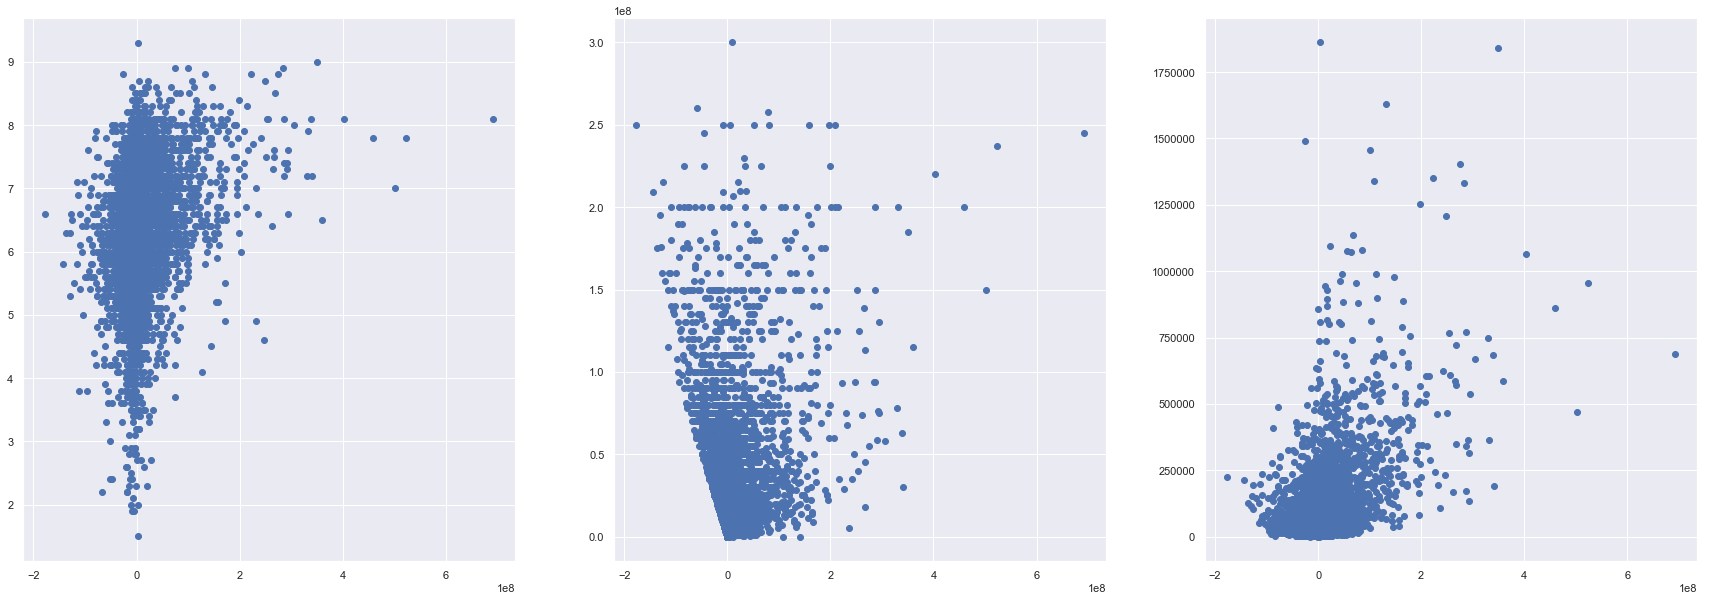

In [63]:
%matplotlib inline

fig, (ax1,ax2,ax3)=plt.subplots(1,3, sharey = False, figsize = (30,10))
data_1 = df_movies_3['score']
data_2 = df_movies_3['budget']
data_3 = df_movies_3['votes']
data_4 = df_movies_3['profit']
ax1.scatter(data_4, data_1)
ax2.scatter(data_4, data_2)
ax3.scatter(data_4, data_3)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'PROFIT/SCORE')

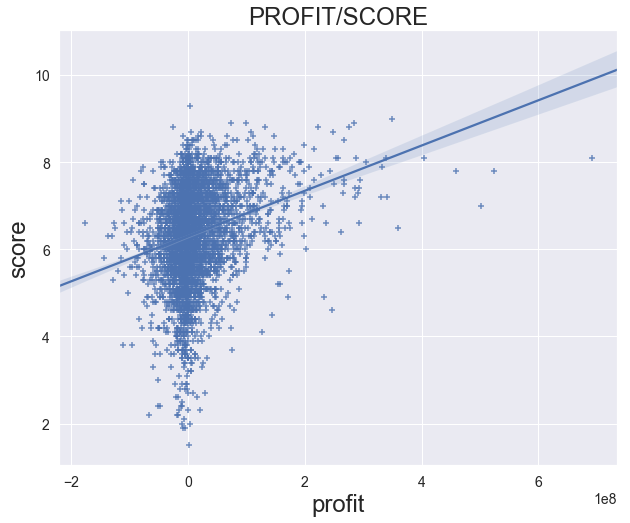

In [260]:
f, ax = plt.subplots(figsize=(10, 8))
x, y = pd.Series(df_movies_3['profit'], name= "profit"), pd.Series(df_movies_3['score'], name="score")
ax = sns.regplot(x=x, y=y, marker="+")
ax.set_title('PROFIT/SCORE')
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'PROFIT/BUDGET')

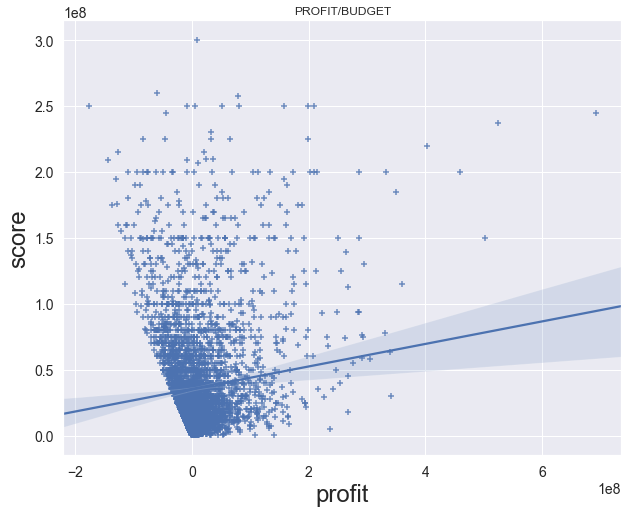

In [413]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
x, y = pd.Series(df_movies_3['profit'], name= "profit"), pd.Series(df_movies_3['budget'], name="score")
ax = sns.regplot(x=x, y=y, marker="+")
ax.set_title('PROFIT/BUDGET')

#maybe you should select only the most profitable movies

In [414]:
# Correlation matrix for all years in the data set:
df_movies_3.corr()

,index,budget,gross,runtime,score,votes,year,profit,return rate
index,1.000000,0.247804,0.151973,0.038120,0.049045,0.165921,0.999480,0.003484,0.002228
budget,0.247804,1.000000,0.680033,0.313064,0.073579,0.451467,0.259835,0.104606,-0.023540
gross,0.151973,0.680033,1.000000,0.253273,0.229552,0.642904,0.167492,0.800295,0.023437
runtime,0.038120,0.313064,0.253273,1.000000,0.417031,0.359817,0.047811,0.087520,-0.028540
score,0.049045,0.073579,0.229552,0.417031,1.000000,0.470648,0.061479,0.251199,0.003194
votes,0.165921,0.451467,0.642904,0.359817,0.470648,1.000000,0.184096,0.502842,0.015162
year,0.999480,0.259835,0.167492,0.047811,0.061479,0.184096,1.000000,0.014695,0.002759
profit,0.003484,0.104606,0.800295,0.087520,0.251199,0.502842,0.014695,1.000000,0.051042
return rate,0.002228,-0.023540,0.023437,-0.028540,0.003194,0.015162,0.002759,0.051042,1.000000


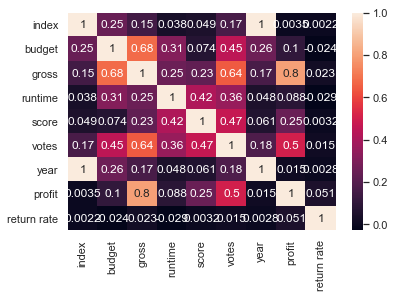

In [415]:
#Heatmap all years
sns.heatmap(df_movies_3.corr(), annot = True)
#https://seaborn.pydata.org/generated/seaborn.heatmap.html 
#https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6

# ANALYSIS TIME PERIODS vs SUCCESS PARAMETERS

Success parameters are:
- score
- profit
- return rate

Time periods are:

- 1986 to 1992
- 2010 to 2016

### Correlation Matrix 1980s

In [409]:
movies_1980s.corr()

,index,budget,gross,runtime,score,votes,year,profit,return rate
index,1.000000,0.184845,0.010486,0.085208,-0.010149,-0.029643,0.992257,-0.058033,0.017064
budget,0.184845,1.000000,0.452166,0.383177,0.130318,0.322013,0.224008,0.125865,-0.107366
gross,0.010486,0.452166,1.000000,0.211168,0.342559,0.591369,0.077663,0.941752,0.106123
runtime,0.085208,0.383177,0.211168,1.000000,0.392287,0.230820,0.109677,0.090392,-0.082405
score,-0.010149,0.130318,0.342559,0.392287,1.000000,0.475604,0.043348,0.331873,0.086442
votes,-0.029643,0.322013,0.591369,0.230820,0.475604,1.000000,0.030204,0.536330,0.068606
year,0.992257,0.224008,0.077663,0.109677,0.043348,0.030204,1.000000,0.001917,0.028835
profit,-0.058033,0.125865,0.941752,0.090392,0.331873,0.536330,0.001917,1.000000,0.158517
return rate,0.017064,-0.107366,0.106123,-0.082405,0.086442,0.068606,0.028835,0.158517,1.000000


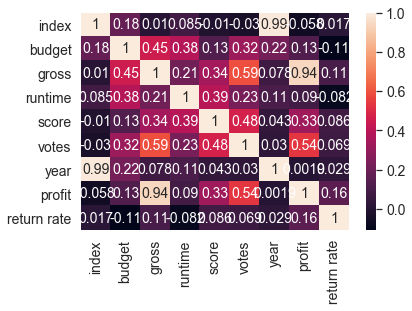

In [410]:
sns.heatmap(movies_1980s.corr(), annot = True)

### Correlation Matrix 2010s

In [411]:
movies_2010s.corr()

,index,budget,gross,runtime,score,votes,year,profit,return rate
index,1.000000,-0.049801,-0.031670,0.042679,-0.002598,-0.185721,0.990342,-0.000863,0.000090
budget,-0.049801,1.000000,0.709897,0.341116,0.145571,0.539967,0.010372,0.121562,-0.152321
gross,-0.031670,0.709897,1.000000,0.284100,0.269921,0.670112,0.033231,0.785379,0.108240
runtime,0.042679,0.341116,0.284100,1.000000,0.439531,0.436556,0.094108,0.100577,-0.119793
score,-0.002598,0.145571,0.269921,0.439531,1.000000,0.508574,0.052945,0.252459,-0.014536
votes,-0.185721,0.539967,0.670112,0.436556,0.508574,1.000000,-0.097184,0.469817,0.053591
year,0.990342,0.010372,0.033231,0.094108,0.052945,-0.097184,1.000000,0.037717,0.005729
profit,-0.000863,0.121562,0.785379,0.100577,0.252459,0.469817,0.037717,1.000000,0.286419
return rate,0.000090,-0.152321,0.108240,-0.119793,-0.014536,0.053591,0.005729,0.286419,1.000000


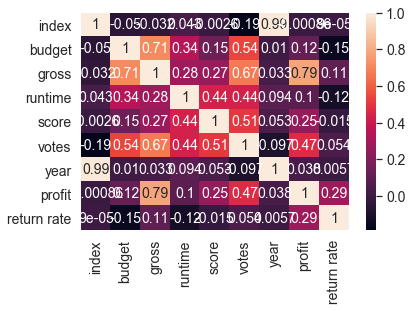

In [412]:
sns.heatmap(movies_2010s.corr(), annot = True)

## 1. SUCCESS PARAMETERS ANALYSIS (1980s and 2010s)

### 1.1 Profit vs Score 1980s

Text(0.5, 1.0, 'PROFIT/SCORE 1980s')

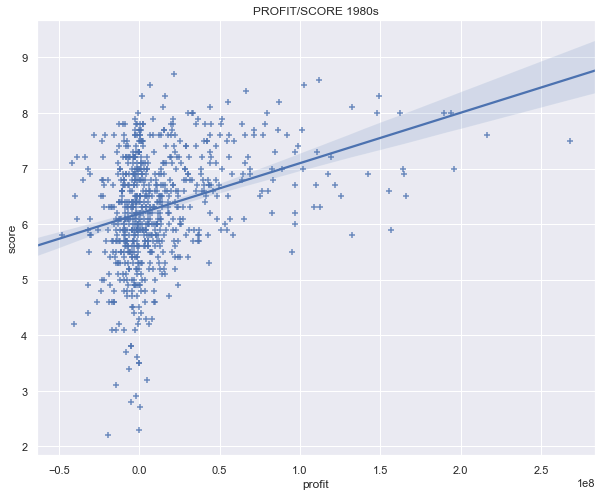

In [421]:
f, ax_1980 = plt.subplots(figsize=(10, 8))
x, y = pd.Series(movies_1980s['profit'], name= "profit"), pd.Series(movies_1980s['score'], name="score")
ax_1980 = sns.regplot(x=x, y=y, marker="+")
ax_1980.set_title('PROFIT/SCORE 1980s')

### 1.2 Profit vs Score 2010s

Text(0.5, 1.0, 'PROFIT/SCORE 2010s')

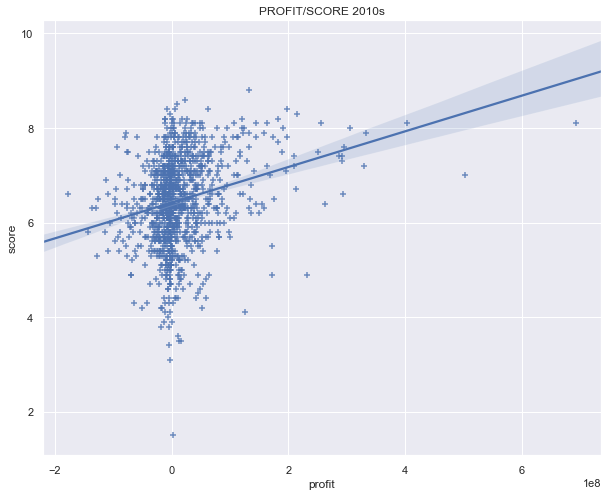

In [422]:
f, ax_2010 = plt.subplots(figsize=(10, 8))
x, y = pd.Series(movies_2010s['profit'], name= "profit"), pd.Series(movies_2010s['score'], name="score")
ax_2010 = sns.regplot(x=x, y=y, marker="+")
ax_2010.set_title('PROFIT/SCORE 2010s')

## 2. BUDGET /  Profit, Score & Rate of Return 

### 2.1 No Budgets difference (1980s vs 2010s) / Profit, Score & Rate of return 

Text(0.5, 1.0, 'PROFIT/BUDGET 1980s')

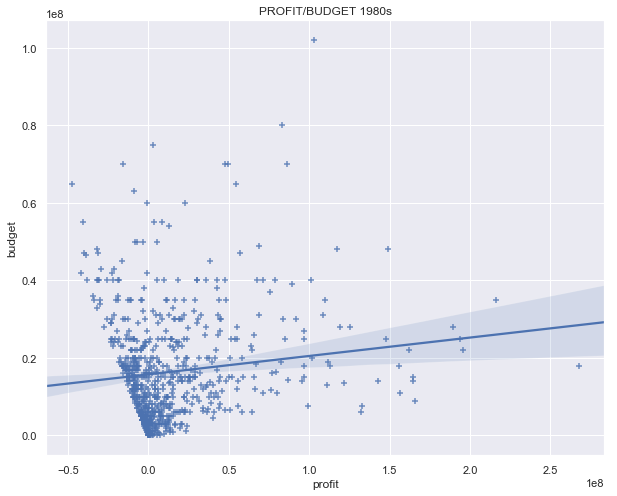

In [347]:
f, ax_1980 = plt.subplots(figsize=(10, 8))
x, y = pd.Series(movies_1980s['profit'], name= "profit"), pd.Series(movies_1980s['budget'], name="budget")
ax_1980 = sns.regplot(x=x, y=y, marker="+")
ax_1980.set_title('PROFIT/BUDGET 1980s')

Text(0.5, 1.0, 'PROFIT/BUDGET 2010s')

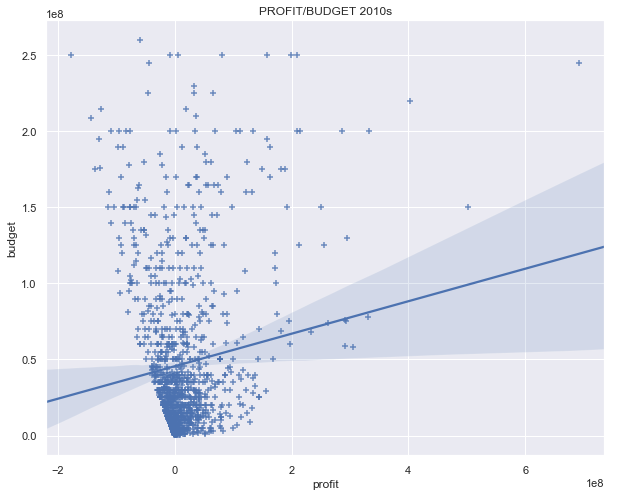

In [81]:
f, ax_2010 = plt.subplots(figsize=(10, 8))
x, y = pd.Series(movies_2010s['profit'], name= "profit"), pd.Series(movies_2010s['budget'], name="budget")
ax_2010 = sns.regplot(x=x, y=y, marker="+")
ax_2010.set_title('PROFIT/BUDGET 2010s')

(-10000000, 100000000)

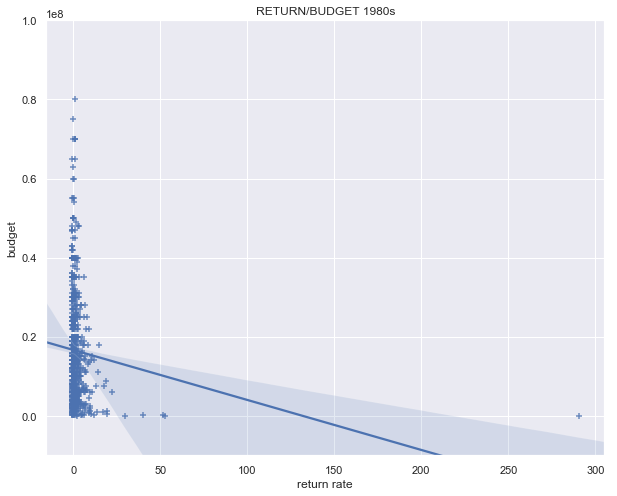

In [344]:
f, ax_1986 = plt.subplots(figsize=(10, 8))
x, y = pd.Series(movies_1980s['return rate'], name= "return rate"), pd.Series(movies_1980s['budget'], name="budget")
ax_1980s_return = sns.regplot(x=x, y=y, marker="+")
ax_1980s_return.set_title('RETURN/BUDGET 1980s')
ax_1980s_return.set_ylim(-10000000,100000000)

(-10000000, 100000000)

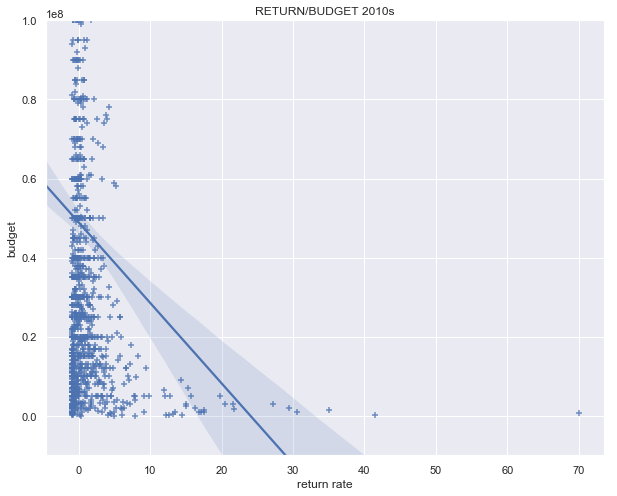

In [345]:
f, ax_2010 = plt.subplots(figsize=(10, 8))
x, y = pd.Series(movies_2010s['return rate'], name= "return rate"), pd.Series(movies_2010s['budget'], name="budget")
ax_2010s_return = sns.regplot(x=x, y=y, marker="+")
ax_2010s_return.set_title('RETURN/BUDGET 2010s')
ax_2010s_return.set_ylim(-10000000,100000000)

### 2.2 High-Low Budgets (1980s vs 2010s) / Profit, Score & Rate of return

#### High-Low Budget / Profit 


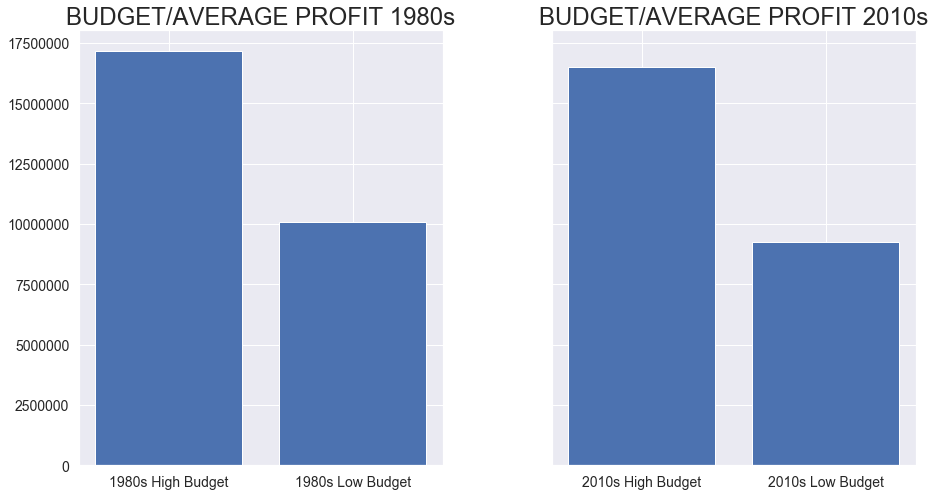

In [429]:
budget_profit_1980s_mean = movies_1980s.groupby('High/Low budget?')['profit'].mean()
budget_profit_2010s_mean = movies_2010s.groupby('High/Low budget?')['profit'].mean()

fig, (ax1,ax2) =plt.subplots(1,2, sharey = True, figsize = (15,8))
fig.subplots_adjust(wspace = 0.3)
ax1.bar(['1980s High Budget', '1980s Low Budget'], budget_profit_1980s_mean)
ax2.bar(['2010s High Budget', '2010s Low Budget'], budget_profit_2010s_mean)
ax1.set_title('BUDGET/AVERAGE PROFIT 1980s')
ax2.set_title('BUDGET/AVERAGE PROFIT 2010s')
ax1.ticklabel_format(style='plain', axis='y')

#### High-Low Budget / Score 
 


Text(0.5, 1.0, 'BUDGET/AVERAGE SCORE 2010s')

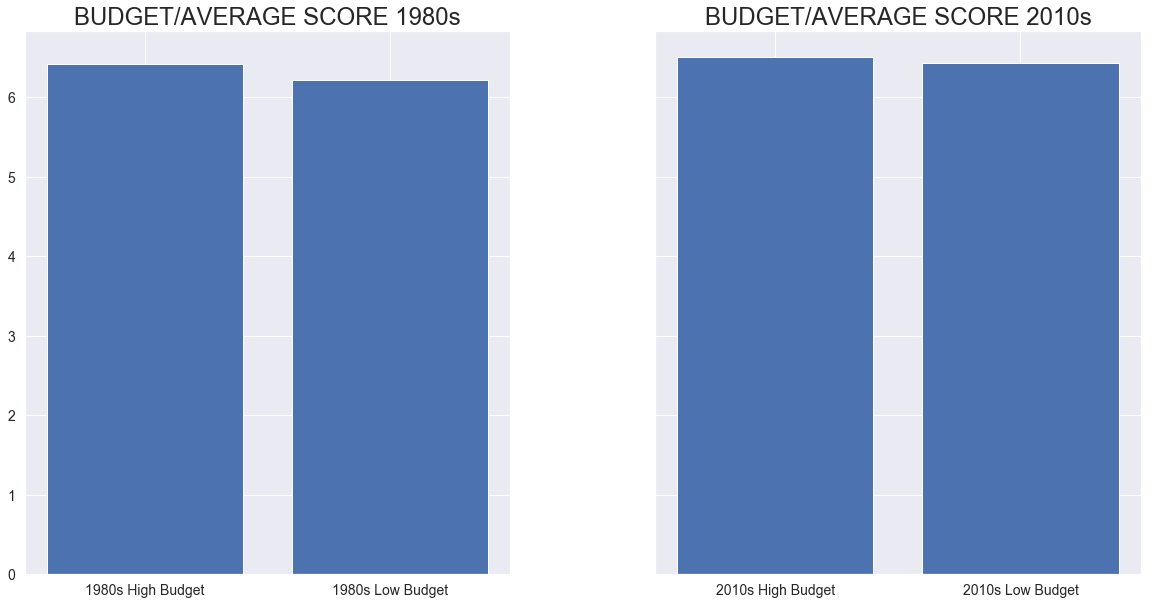

In [426]:
budget_score_1980s_mean = movies_1980s.groupby('High/Low budget?')['score'].mean()
budget_score_2010s_mean = movies_2010s.groupby('High/Low budget?')['score'].mean()

fig, (ax1,ax2) =plt.subplots(1,2, sharey = True, figsize = (20,10))
fig.subplots_adjust(wspace = 0.3)
ax1.bar(['1980s High Budget', '1980s Low Budget'], budget_score_1980s_mean)
ax2.bar(['2010s High Budget', '2010s Low Budget'], budget_score_2010s_mean)
ax1.set_title('BUDGET/AVERAGE SCORE 1980s')
ax2.set_title('BUDGET/AVERAGE SCORE 2010s')


#### High-Low Budget / Return 


Text(0.5, 1.0, 'BUDGET/AVERAGE RETURN 2010s')

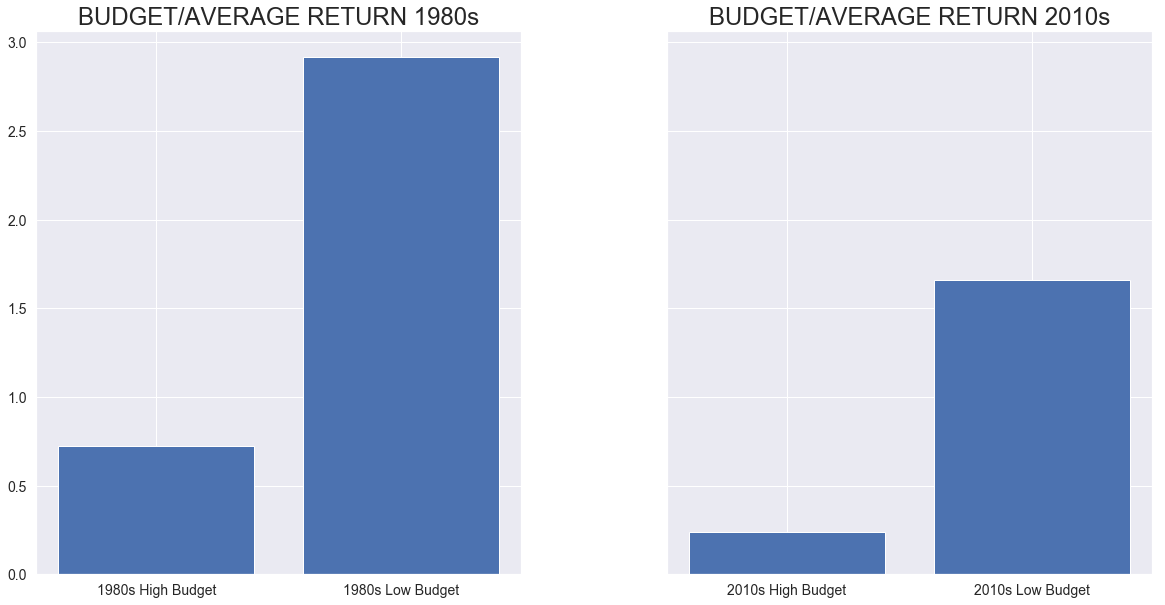

In [446]:
budget_return_1980s_mean = movies_1980s.groupby('High/Low budget?')['return rate'].mean()
budget_return_2010s_mean = movies_2010s.groupby('High/Low budget?')['return rate'].mean()

fig, (ax1,ax2) =plt.subplots(1,2, sharey = True, figsize = (20,10))
fig.subplots_adjust(wspace = 0.3)
ax1.bar(['1980s High Budget', '1980s Low Budget'], budget_return_1980s_mean)
ax2.bar(['2010s High Budget', '2010s Low Budget'], budget_return_2010s_mean)
ax1.set_title('BUDGET/AVERAGE RETURN 1980s')
ax2.set_title('BUDGET/AVERAGE RETURN 2010s')

### 2.3 Correlation matrices (High/low budgets) 

#### 1980s correlation matrices (High/low budgets) 

In [337]:
movies_1980s_HB.corr()

,index,budget,gross,runtime,score,votes,year,profit,return rate
index,1.000000,0.233137,0.047085,0.078268,-0.028084,-0.054568,0.993423,-0.016521,-0.047703
budget,0.233137,1.000000,0.319086,0.237479,0.118434,0.254312,0.266078,0.052546,-0.091734
gross,0.047085,0.319086,1.000000,0.105273,0.441540,0.611441,0.115589,0.963183,0.861773
runtime,0.078268,0.237479,0.105273,1.000000,0.409590,0.186380,0.097141,0.043560,0.015004
score,-0.028084,0.118434,0.441540,0.409590,1.000000,0.558797,0.029919,0.431654,0.390201
votes,-0.054568,0.254312,0.611441,0.186380,0.558797,1.000000,0.004376,0.572133,0.507013
year,0.993423,0.266078,0.115589,0.097141,0.029919,0.004376,1.000000,0.046316,0.010062
profit,-0.016521,0.052546,0.963183,0.043560,0.431654,0.572133,0.046316,1.000000,0.934073
return rate,-0.047703,-0.091734,0.861773,0.015004,0.390201,0.507013,0.010062,0.934073,1.000000


In [338]:
movies_1980s_LB.corr()

,index,budget,gross,runtime,score,votes,year,profit,return rate
index,1.000000,0.006424,-0.151331,0.017404,-0.015586,-0.076435,0.991815,-0.159659,0.043895
budget,0.006424,1.000000,0.372107,0.169696,0.035002,0.072392,0.026648,0.230827,-0.145894
gross,-0.151331,0.372107,1.000000,0.127235,0.191816,0.390036,-0.096341,0.989016,0.118611
runtime,0.017404,0.169696,0.127235,1.000000,0.368713,0.116129,0.029753,0.106354,-0.099103
score,-0.015586,0.035002,0.191816,0.368713,1.000000,0.397963,0.029747,0.195502,0.090235
votes,-0.076435,0.072392,0.390036,0.116129,0.397963,1.000000,-0.017464,0.397335,0.095090
year,0.991815,0.026648,-0.096341,0.029753,0.029747,-0.017464,1.000000,-0.105235,0.058252
profit,-0.159659,0.230827,0.989016,0.106354,0.195502,0.397335,-0.105235,1.000000,0.147569
return rate,0.043895,-0.145894,0.118611,-0.099103,0.090235,0.095090,0.058252,0.147569,1.000000


#### 2010s correlation matrices (High/low budgets) 

In [339]:
movies_2010s_HB.corr()

,index,budget,gross,runtime,score,votes,year,profit,return rate
index,1.000000,-0.006630,-0.001291,0.075691,0.046354,-0.167394,0.993049,0.002907,-0.019497
budget,-0.006630,1.000000,0.627776,0.253375,0.225396,0.477068,0.036261,0.114200,-0.056358
gross,-0.001291,0.627776,1.000000,0.230876,0.400221,0.640662,0.051193,0.844993,0.601943
runtime,0.075691,0.253375,0.230876,1.000000,0.436963,0.454367,0.125489,0.120590,0.086502
score,0.046354,0.225396,0.400221,0.436963,1.000000,0.609075,0.101721,0.355946,0.293758
votes,-0.167394,0.477068,0.640662,0.454367,0.609075,1.000000,-0.093910,0.489914,0.363040
year,0.993049,0.036261,0.051193,0.125489,0.101721,-0.093910,1.000000,0.040425,0.019630
profit,0.002907,0.114200,0.844993,0.120590,0.355946,0.489914,0.040425,1.000000,0.806975
return rate,-0.019497,-0.056358,0.601943,0.086502,0.293758,0.363040,0.019630,0.806975,1.000000


In [340]:
movies_2010s_LB.corr()

,index,budget,gross,runtime,score,votes,year,profit,return rate
index,1.000000,-0.072228,-0.015759,0.046922,-0.041194,-0.220758,0.990573,0.004194,-0.012514
budget,-0.072228,1.000000,0.311988,0.237365,0.031339,0.154530,-0.052921,0.040588,-0.256603
gross,-0.015759,0.311988,1.000000,0.054645,0.109212,0.479238,0.032246,0.961966,0.423191
runtime,0.046922,0.237365,0.054645,1.000000,0.465727,0.206309,0.069015,-0.010779,-0.140573
score,-0.041194,0.031339,0.109212,0.465727,1.000000,0.491996,0.009226,0.105844,-0.058054
votes,-0.220758,0.154530,0.479238,0.206309,0.491996,1.000000,-0.132119,0.459569,0.155593
year,0.990573,-0.052921,0.032246,0.069015,0.009226,-0.132119,1.000000,0.049127,0.002658
profit,0.004194,0.040588,0.961966,-0.010779,0.105844,0.459569,0.049127,1.000000,0.518835
return rate,-0.012514,-0.256603,0.423191,-0.140573,-0.058054,0.155593,0.002658,0.518835,1.000000


# 3. GENRES / Profit, Score & Rate of Return

In [82]:
#Look at genres:
movies_1980s_genres_unique = movies_1980s['genre'].unique()
sorted(movies_1980s_genres_unique)

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Thriller']

In [83]:
movies_2010s_genres_unique = movies_2010s['genre'].unique()
sorted(movies_2010s_genres_unique)

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'Western']

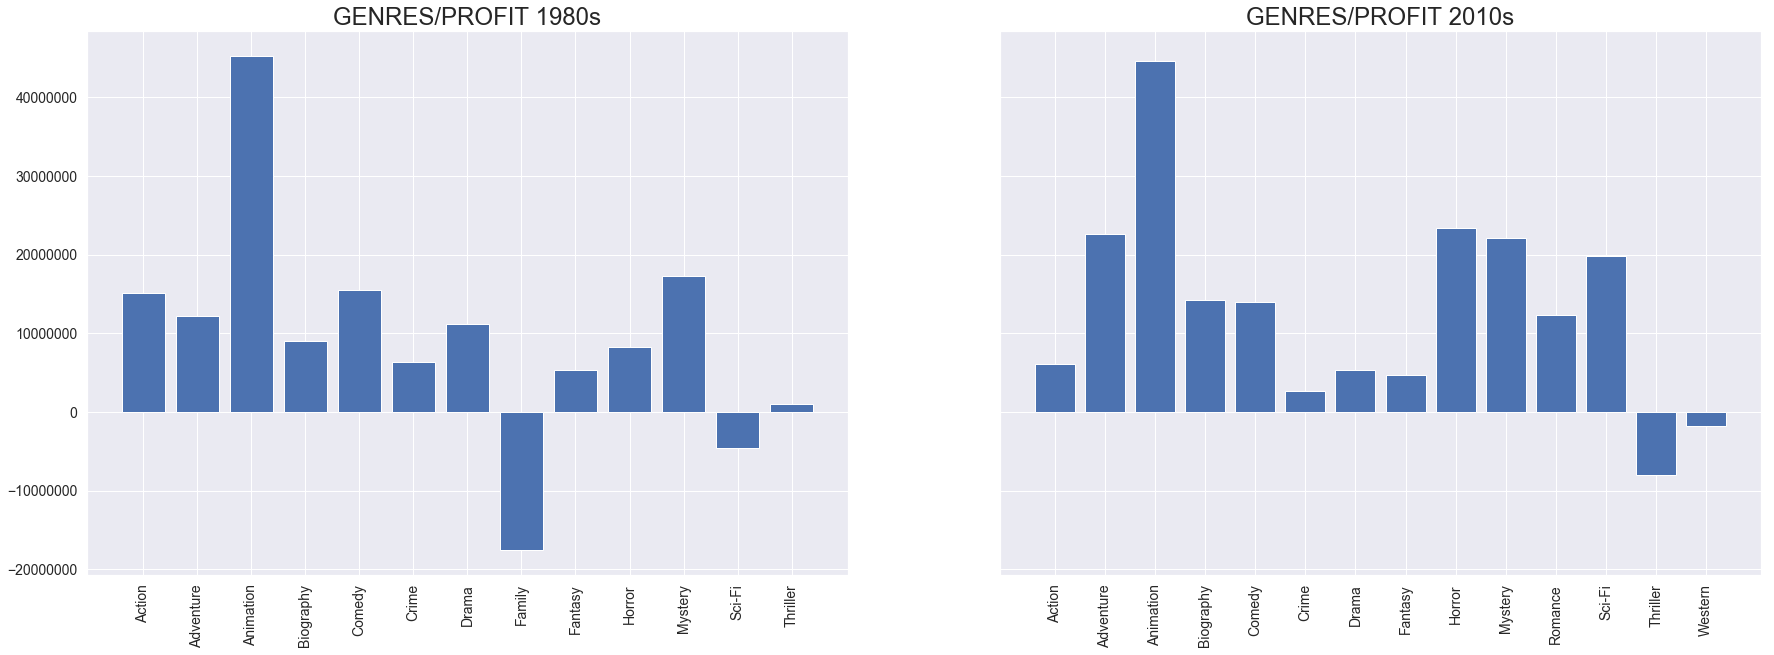

In [432]:
#GENRE VS PROFIT
genres_profit_1980 = movies_1980s.groupby('genre')['profit'].mean()
genres_profit_2010 = movies_2010s.groupby('genre')['profit'].mean()

fig, (ax1,ax2) =plt.subplots(1,2, sharey = True, figsize = (30,10))
ax1.bar(sorted(movies_1980s_genres_unique), genres_profit_1980)
ax2.bar(sorted(movies_2010s_genres_unique), genres_profit_2010)
ax1.set_title('GENRES/PROFIT 1980s')
ax2.set_title('GENRES/PROFIT 2010s')
ax1.set_xticklabels(labels = sorted(movies_1980s_genres_unique), rotation=90)
ax2.set_xticklabels(labels = sorted(movies_2010s_genres_unique), rotation=90)
ax1.ticklabel_format(style ='plain', axis='y')

[Text(0, 0, 'Action'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Western')]

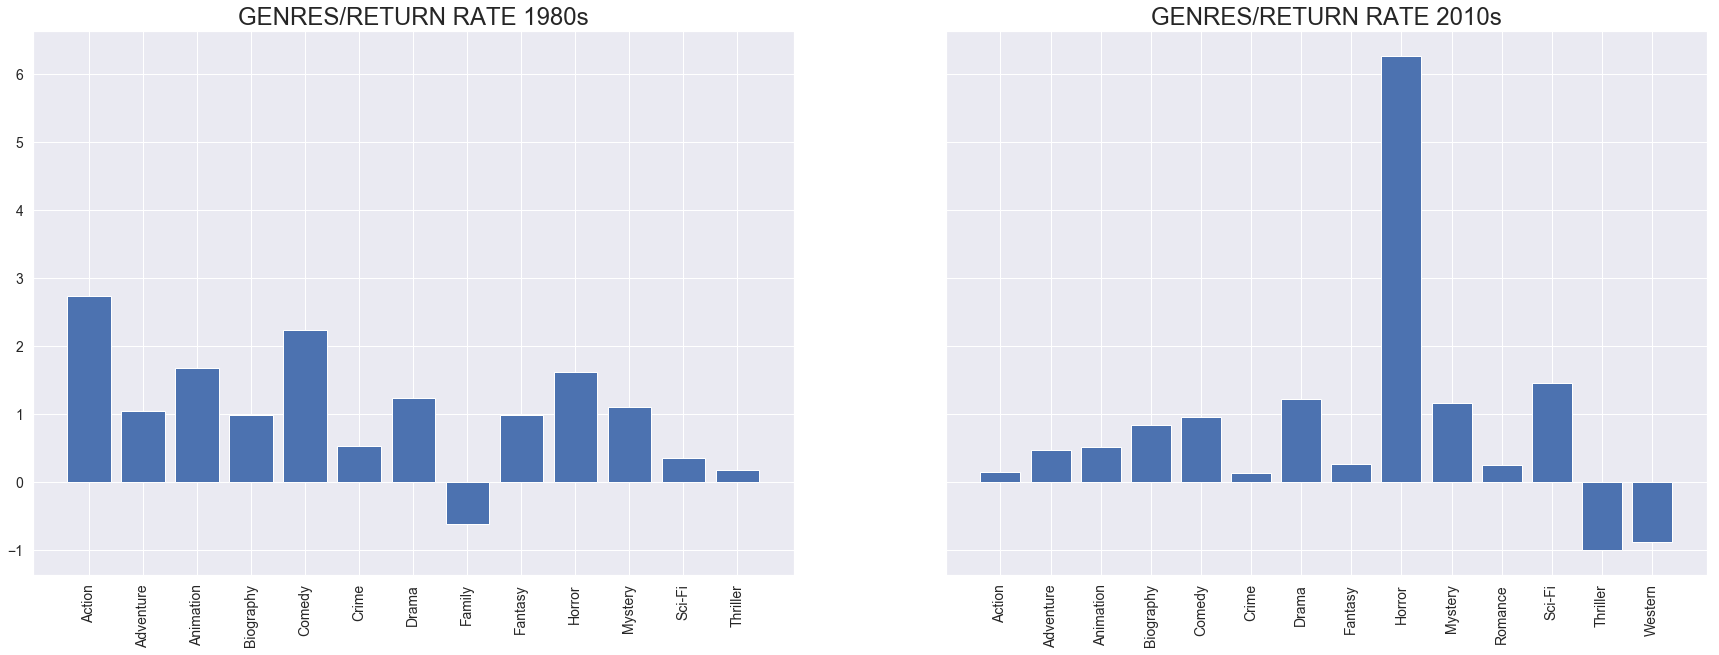

In [433]:
#GENRE VS RATE OF RETURN
genres_rr_1980 = movies_1980s.groupby('genre')['return rate'].mean()
genres_rr_2010 = movies_2010s.groupby('genre')['return rate'].mean()

fig, (ax1,ax2) =plt.subplots(1,2, sharey = True, figsize = (30,10))
ax1.bar(sorted(movies_1980s_genres_unique), genres_rr_1980)
ax2.bar(sorted(movies_2010s_genres_unique), genres_rr_2010)
ax1.set_title('GENRES/RETURN RATE 1980s')
ax2.set_title('GENRES/RETURN RATE 2010s')
ax1.set_xticklabels(labels = sorted(movies_1980s_genres_unique), rotation=90)
ax2.set_xticklabels(labels = sorted(movies_2010s_genres_unique), rotation=90)

[Text(0, 0, 'Action'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Western')]

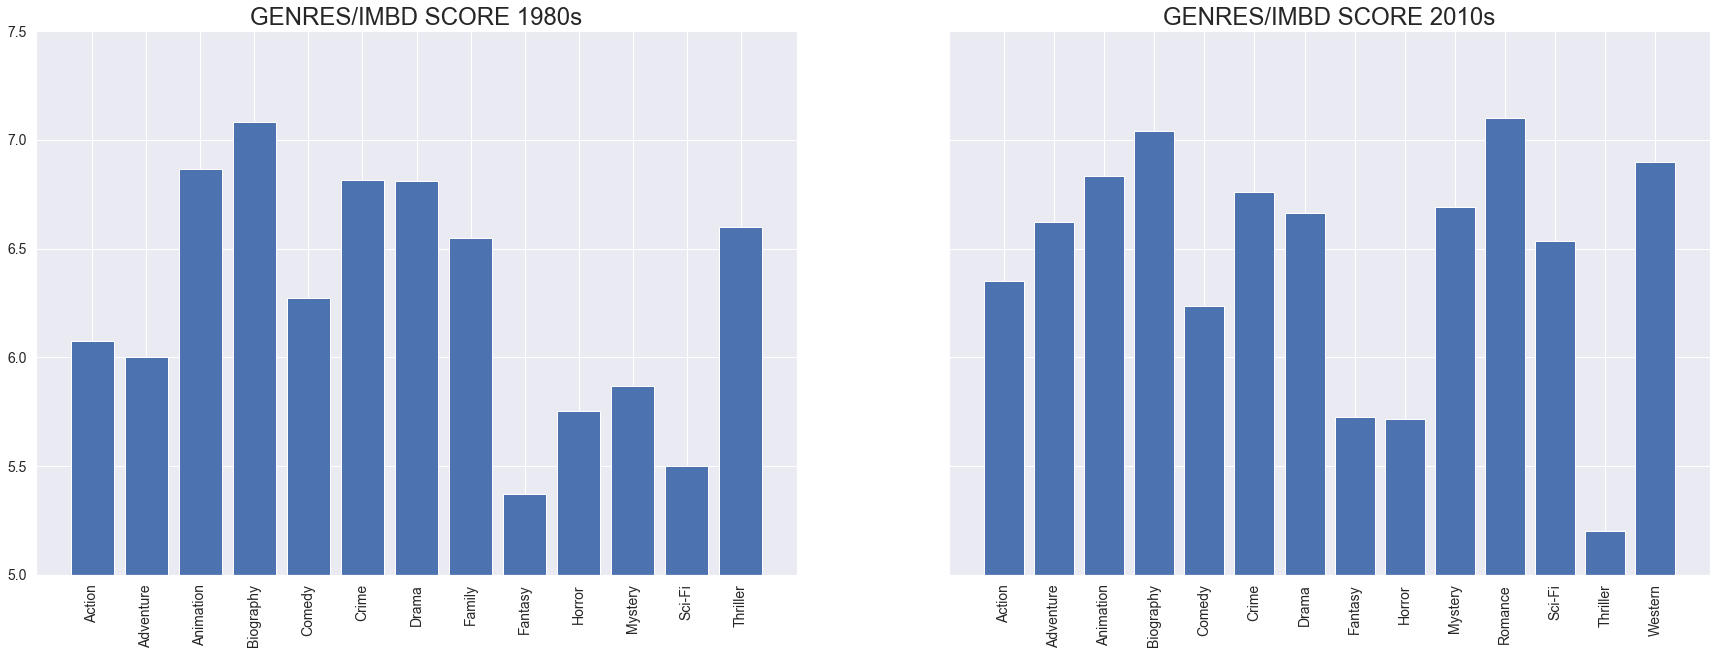

In [435]:
#GENRE VS SCORE
genres_score_1980 = movies_1980s.groupby('genre')['score'].mean()
genres_score_2010 = movies_2010s.groupby('genre')['score'].mean()

fig, (ax1,ax2) =plt.subplots(1,2, sharey = True, figsize = (30,10))
ax1.bar(sorted(movies_1980s_genres_unique), genres_score_1980)
ax2.bar(sorted(movies_2010s_genres_unique), genres_score_2010)
ax1.set_title('GENRES/IMBD SCORE 1980s')
ax2.set_title('GENRES/IMBD SCORE 2010s')
ax1.set_ylim(5.0,7.5)
ax1.set_xticklabels(labels = sorted(movies_1980s_genres_unique), rotation=90)
ax2.set_xticklabels(labels = sorted(movies_2010s_genres_unique), rotation=90)

In [232]:
diff = genres_score_1980 - genres_score_2010

In [233]:
diff

genre
Action      -0.279071
Adventure   -0.621795
Animation    0.032640
Biography    0.042045
Comedy       0.034310
Crime        0.056370
Drama        0.145625
Family            NaN
Fantasy     -0.352273
Horror       0.037436
Mystery     -0.822222
Romance           NaN
Sci-Fi      -1.033333
Thriller     1.400000
Western           NaN
Name: score, dtype: float64

# 4. Company / Rate of Return, Score and Profit (TBC)

### 4.1 Company / Score (1980s and 2010s)  

In [321]:
movies_1980s['company'].value_counts().head(10)

Paramount Pictures                         49
Warner Bros.                               38
Universal Pictures                         36
Columbia Pictures Corporation              31
Orion Pictures                             25
TriStar Pictures                           23
Twentieth Century Fox Film Corporation     20
Touchstone Pictures                        20
De Laurentiis Entertainment Group (DEG)    15
Metro-Goldwyn-Mayer (MGM)                  12
Name: company, dtype: int64

In [440]:
movies_1980s_companies_top10_bycount = movies_1980s[(movies_1980s['company'] == 'Paramount Pictures') | (movies_1980s['company'] == 'Columbia Pictures Corporation') | (movies_1980s['company'] == 'Warner Bros.') | (movies_1980s['company'] == 'Universal Pictures') | (movies_1980s['company'] == 'Orion Pictures') | (movies_1980s['company'] == 'TriStar Pictures') | (movies_1980s['company'] == 'Twentieth Century Fox Film Corporation') | (movies_1980s['company'] == 'Touchstone Pictures') | (movies_1980s['company'] == 'De Laurentiis Entertainment Group (DEG)') | (movies_1980s['company'] == 'Metro-Goldwyn-Mayer (MGM)')]
movies_1980s_companies_top10_byscore = movies_1980s_companies_top10_bycount.groupby('company')['score'].mean()
movies_1980s_companies_top10_byscore.sort_values(ascending=False)
#movies_1980s[(movies_1980s['company'] = 'Paramount Pictures') & (movies_1980s['company'] = 'Warner Bros.')]

company
Twentieth Century Fox Film Corporation     6.825000
Orion Pictures                             6.592000
Warner Bros.                               6.494737
Universal Pictures                         6.452778
Touchstone Pictures                        6.405000
Metro-Goldwyn-Mayer (MGM)                  6.391667
Paramount Pictures                         6.371429
Columbia Pictures Corporation              6.316129
TriStar Pictures                           6.208696
De Laurentiis Entertainment Group (DEG)    6.146667
Name: score, dtype: float64

In [314]:
movies_2010s['company'].value_counts().head(10)

Columbia Pictures                         59
Universal Pictures                        58
Warner Bros.                              51
Paramount Pictures                        45
Twentieth Century Fox Film Corporation    39
Summit Entertainment                      28
Walt Disney Pictures                      26
New Line Cinema                           25
Fox 2000 Pictures                         22
Lionsgate                                 19
Name: company, dtype: int64

In [439]:
movies_2010s_companies_top10_bycount = movies_2010s[(movies_2010s['company'] == 'Columbia Pictures') | (movies_2010s['company'] == 'Warner Bros.') | (movies_2010s['company'] == 'Universal Pictures') | (movies_2010s['company'] == 'Paramount Pictures') | (movies_2010s['company'] == 'Summit Entertainment') | (movies_2010s['company'] == 'Twentieth Century Fox Film Corporation') | (movies_2010s['company'] == 'Walt Disney Pictures') | (movies_1980s['company'] == 'New Line Cinema') | (movies_2010s['company'] == 'Fox 2000 Pictures') | (movies_2010s['company'] == 'Lionsgate')] 
movies_2010s_companies_top10_byscore = movies_2010s_companies_top10_bycount.groupby('company')['score'].mean()
movies_2010s_companies_top10_byscore.sort_values(ascending=False)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


company
Walt Disney Pictures                      6.815385
Warner Bros.                              6.613725
Paramount Pictures                        6.482222
Twentieth Century Fox Film Corporation    6.474359
Universal Pictures                        6.400000
Fox 2000 Pictures                         6.331818
Summit Entertainment                      6.310714
Lionsgate                                 6.284211
Columbia Pictures                         6.249153
Name: score, dtype: float64

### 4.2 Company / Rate of Return (1980s and 2010s) 

In [441]:
movies_1980s_top_10_companies_by_return = movies_1980s_companies_top10_bycount.groupby('company')['return rate'].mean()
movies_1980s_top_10_companies_by_return.sort_values(ascending=False)

company
Columbia Pictures Corporation              10.456115
Touchstone Pictures                         2.537303
Paramount Pictures                          2.410450
Twentieth Century Fox Film Corporation      1.349206
Warner Bros.                                1.304445
Universal Pictures                          1.232538
Orion Pictures                              1.068910
Metro-Goldwyn-Mayer (MGM)                   0.914942
TriStar Pictures                            0.708873
De Laurentiis Entertainment Group (DEG)     0.021118
Name: return rate, dtype: float64

In [442]:
movies_2010s_top_10_companies_by_return = movies_2010s_companies_top10_bycount.groupby('company')['return rate'].mean()
movies_2010s_top_10_companies_by_return.sort_values(ascending=False)

company
Paramount Pictures                        1.704607
Universal Pictures                        1.518041
Fox 2000 Pictures                         0.615109
Columbia Pictures                         0.565036
Twentieth Century Fox Film Corporation    0.529478
Summit Entertainment                      0.430618
Warner Bros.                              0.369503
Lionsgate                                 0.248128
Walt Disney Pictures                      0.147546
Name: return rate, dtype: float64

### 4.2 Company / Profit (1980s and 2010s) 

In [443]:
movies_1980s_top_10_companies_by_profit = movies_1980s_companies_top10_bycount.groupby('company')['profit'].mean()
movies_1980s_top_10_companies_by_profit.sort_values(ascending=False)

company
Touchstone Pictures                        4.058785e+07
Paramount Pictures                         3.734339e+07
Warner Bros.                               2.897057e+07
Twentieth Century Fox Film Corporation     2.546808e+07
Universal Pictures                         1.804245e+07
Columbia Pictures Corporation              1.447106e+07
Metro-Goldwyn-Mayer (MGM)                  1.258802e+07
Orion Pictures                             9.977869e+06
TriStar Pictures                           5.005978e+06
De Laurentiis Entertainment Group (DEG)   -1.121376e+06
Name: profit, dtype: float64

In [444]:
movies_2010s_top_10_companies_by_return = movies_2010s_companies_top10_bycount.groupby('company')['profit'].mean()
movies_2010s_top_10_companies_by_return.sort_values(ascending=False)

company
Universal Pictures                        3.548879e+07
Paramount Pictures                        2.659712e+07
Warner Bros.                              2.107490e+07
Summit Entertainment                      2.103471e+07
Twentieth Century Fox Film Corporation    1.825282e+07
Columbia Pictures                         1.675169e+07
Lionsgate                                 1.326990e+07
Fox 2000 Pictures                         6.526012e+06
Walt Disney Pictures                      4.985941e+05
Name: profit, dtype: float64

# 5. Country distribution


In [449]:
movies_1980s['country'].value_counts()
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html

USA             619
UK               48
France           12
Canada            8
Australia         6
Japan             5
Ireland           3
Italy             3
Hong Kong         2
Spain             1
Germany           1
Sweden            1
New Zealand       1
Mexico            1
South Africa      1
Taiwan            1
Name: country, dtype: int64

In [334]:
movies_2010s['country'].value_counts()

USA               913
UK                116
France             34
Canada             18
Australia          11
Germany             9
China               9
Japan               9
Spain               7
Ireland             7
India               7
Hong Kong           5
Mexico              4
Denmark             4
Czech Republic      3
New Zealand         3
Russia              3
South Africa        3
Chile               2
Belgium             2
Indonesia           2
Taiwan              1
South Korea         1
Panama              1
Israel              1
Norway              1
Colombia            1
Iran                1
Switzerland         1
Kenya               1
Austria             1
Argentina           1
Finland             1
Malta               1
Hungary             1
Name: country, dtype: int64

 # 7. Budget / Return Rate (1986 vs 2016)

In [99]:
# put it back up
# adjust for inflation as well? actually it does not change the return rate since bugdet will have to be inflation adjusted as well.
movies_1986 = df_movies_3[df_movies_3['year'] == 1986]
movies_2016 = df_movies_3[df_movies_3['year'] == 2016]

## And compare it with budget for both time periods 

(-10000000, 50000000)

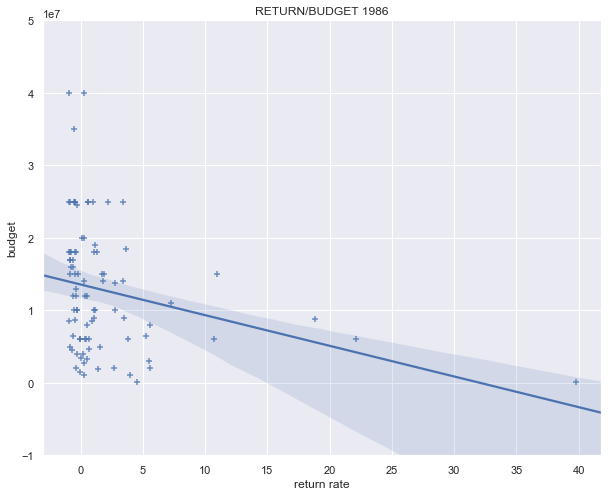

In [110]:
# filter the data, so that it is clearer (top ten?, pick one year only?)
# subplots
# format labels etc.

f, ax_1986 = plt.subplots(figsize=(10, 8))
x, y = pd.Series(movies_1986['return rate'], name= "return rate"), pd.Series(movies_1986['budget'], name="budget")
ax_1986 = sns.regplot(x=x, y=y, marker="+")
ax_1986.set_title('RETURN/BUDGET 1986')
ax_1986.set_ylim(-10000000,50000000)

Text(0.5, 1.0, 'RETURN/BUDGET 2016')

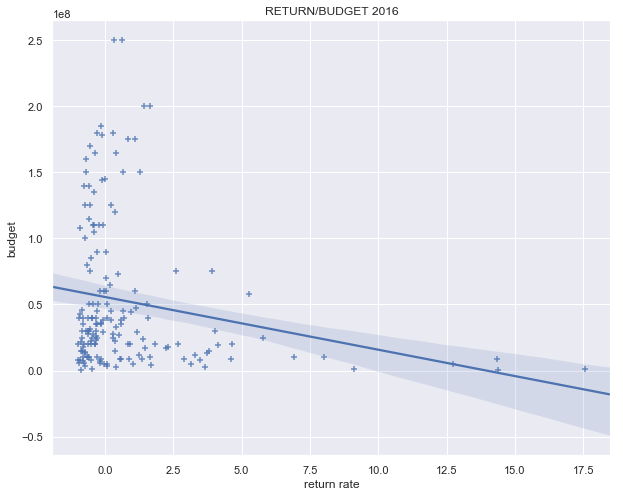

In [111]:
f, ax_2016 = plt.subplots(figsize=(10, 8))
x, y = pd.Series(movies_2016['return rate'], name= "return rate"), pd.Series(movies_2016['budget'], name="budget")
ax_2016 = sns.regplot(x=x, y=y, marker="+")
ax_2016.set_title('RETURN/BUDGET 2016')

# 1986 and 2016 correlation matrices

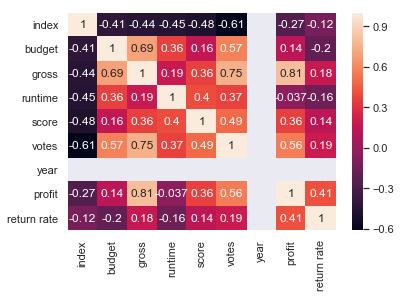

In [112]:
sns.heatmap(movies_2016.corr(), annot = True)

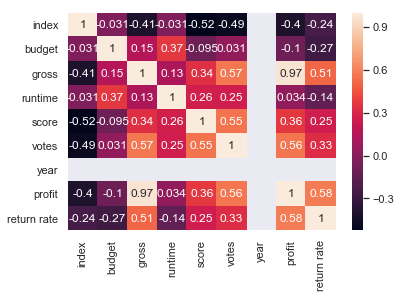

In [113]:
sns.heatmap(movies_1986.corr(), annot = True)

# 8. Chi square test to see if we have dependent categorical variables

We will construct a contingency table with variables (Positive Return? and High/Low Budget?) to check if these two variables are independent. 

In [190]:
#1980s:
cont_table_1980s = pd.crosstab(movies_1980s['High/Low budget?'],movies_1980s['Positive return?'])
cont_table_1980s

Positive return?,No,Yes
High/Low budget?,,
High,158,182
Low,159,214


In [191]:
from scipy import stats
import scipy.stats as stats
import statsmodels as sm
stats.chi2_contingency(cont_table_1980s)

(0.9139946535628299,
 0.3390567365272557,
 1,
 array([[151.16409537, 188.83590463],
        [165.83590463, 207.16409537]]))

In [189]:
#2010s:
cont_table_2010s = pd.crosstab(movies_2010s['High/Low budget?'],movies_2010s['Positive return?'])
cont_table_2010s

Positive return?,No,Yes
High/Low budget?,,
High,295,297
Low,297,296


In [194]:
stats.chi2_contingency(cont_table_2010s)
#we have independent variables !! as p-value is greater than alpha.
#link: https://codingdisciple.com/chi-squared-python.html
#H0: there is no relationship between the variables
#H1: there is a relationship between the variables
#We can't reject the null!

(0.000845307934623836,
 0.9768054285756735,
 1,
 array([[295.75021097, 296.24978903],
        [296.24978903, 296.75021097]]))

The 'high/low budget?' and 'Positive return?' are independent variables because p-value is greater than alpha (for both 1980s and 2010s movies)

H0: there is no relationship between the variables

H1: there is a relationship between the variables

We can't reject the null!

link: https://codingdisciple.com/chi-squared-python.html


# 9. Hypothesis testing t-distribution (2 samples): 

We will:

- Test if the average score of movies in the 1980s is significantly different from the average score of movies in 2010s

- Test if the average rate of return of movies in the 1980s is significantly different from the average rate of return of movies in 2010s

- Test if the average rate of return of low-budget movies in the 1980s is significantly different from the average rate of return of high-budget movies in the same period

- Test if the average rate of return low-budget movies in the 2010s is significantly different from the average rate of return of high-budget movies in the same period

Ho (null hypothesis) : it is not significantly different

H1 (alternative hypothesis): it is significantly different 

In [214]:
# first conduction independence test with chi squared (lab!!)
# first 2 sample testing for a continuous deistribution (the one we have), you want to prove that mean of the differences is different from 0
# T-test is to prove that the means of two samples are different, population or sample from that pop for example. 
# can I conduct the tests without having population parameters?
# we can conduct the hypothesis testing for t-distribution or 2 sample test hypothesis?
# also can conduct a test to check if my sample data follows a certain distribution, poisson, no since poisson is discreet?

In [ ]:
#1980s: 2 samples with different low-high budget, test if the mean score of these 2 samples are significantly different

## 1980s:

In [221]:
from scipy.stats import ttest_ind
ttest_ind(movies_1980s_HB['return rate'], movies_1980s_LB['return rate'])

Ttest_indResult(statistic=-2.5184681155792057, pvalue=0.012005056824630767)

In [222]:
ttest_ind(movies_1980s_HB['score'], movies_1980s_LB['score'])

Ttest_indResult(statistic=2.67248045438751, pvalue=0.007701833773294263)

In [223]:
ttest_ind(movies_1980s_HB['profit'], movies_1980s_LB['profit'])

Ttest_indResult(statistic=2.5987569211740023, pvalue=0.009550118774400942)

## 2010s:

In [148]:
ttest_ind(movies_2010s_HB['return rate'], movies_2010s_LB['return rate'])


Ttest_indResult(statistic=2.081304089265378, pvalue=0.037620722726262316)

In [224]:
ttest_ind(movies_2010s_HB['score'], movies_2010s_LB['score'])

Ttest_indResult(statistic=1.6533445042963792, pvalue=0.09852608812883298)

In [225]:
ttest_ind(movies_2010s_HB['profit'], movies_2010s_LB['profit'])

Ttest_indResult(statistic=2.081304089265378, pvalue=0.037620722726262316)

## 1980s vs 2010s

In [450]:
ttest_ind(movies_1980s['score'], movies_2010s['score'])
# there is significant different (we reject null hypothesis)

Ttest_indResult(statistic=-3.56713939047063, pvalue=0.00036985787825860567)

In [451]:
ttest_ind(movies_1980s['return rate'], movies_2010s['return rate'])
# there is significant different (we reject null hypothesis)

Ttest_indResult(statistic=2.4879051385343662, pvalue=0.012935121427206701)

In [452]:
ttest_ind(movies_1980s_HB['return rate'], movies_2010s_HB['return rate'])
# there is significant different (we reject null hypothesis)

Ttest_indResult(statistic=4.89806165735805, pvalue=1.1410916130031536e-06)

In [453]:
ttest_ind(movies_1980s_LB['return rate'], movies_2010s_LB['return rate'])
# no significant difference !!!!

Ttest_indResult(statistic=1.7677804312188035, pvalue=0.07741390747931397)

In [246]:
movies_2010s['score'].mean()

6.469198312236296

In [247]:
movies_1980s['score'].mean()

6.310799438990175

In [228]:
movies_2010s_HB['score'].mean()

6.512331081081082

In [229]:
movies_2010s_LB['score'].mean()

6.426138279932544

In [259]:
movies_1980s_LB['return rate'].mean()

2.9188561805225133

In [258]:
movies_2010s_LB['return rate'].mean()

1.6580922275538073

In [256]:
movies_1980s_HB['return rate'].mean()

0.7208349772290003

In [257]:
movies_2010s_HB['return rate'].mean()

0.24015707741919246

Thanks to the T test, we can conclude that having a higher budget in 2010 has almost no impact on the average score given by users since according to the T test, there is no significant difference between the average score of High budget movies and low budget movies in 2010s.

# 10. SUMMARY

# 1980s

In [ ]:
#Country:

In [ ]:
#Company:

In [ ]:
#Genre:

# 2010s

In [ ]:
#Country:

In [ ]:
#Company:

In [ ]:
#Genre: